### 모델설명

층의 개수: 4개<br>
드랍아웃: 1개<br>

층1: input 노드 5개<br>
드랍아웃:20% 버림<br>
층2: hidden layer 노드 128개<br>
층3: hidden layer 노드 64개<br>
층4: output 노드 1개<br>
loss function: mse<br>
bias의 초기값 정하는 방식: zeros<br>
epoch: 3000<br>
상관계수:-0.715579

# 딥러닝으로 인덱스 도출

In [18]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense,Input, Dropout
import pandas as pd
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
# 데이터 모두 합친 파일 가져오기 
filenames = os.listdir('../data/total2/')
filenames

['01_hagye1.csv',
 '02_sanggye2.csv',
 '03_gyonam.csv',
 '04_sanggye10.csv',
 '05_sanggye5.csv',
 '06_sanggye2.csv',
 '07_sanggye67.csv',
 '08_sanggye1.csv',
 '09_sanggye67.csv',
 '10_jongno1234.csv',
 '11_jongno1234.csv',
 '12_jongno1234.csv',
 '13_jongno1234.csv',
 '14_jongno1234.csv',
 '15_jongno1234.csv',
 '16_jongno1234.csv',
 '17_hagye1.csv',
 '18_sanggye2.csv',
 '19_gongneung1.csv',
 '20_gongneung1.csv',
 '21_gongneung2.csv',
 '22_wolgye3.csv',
 '23_junggye23.csv',
 '24_sanggye2.csv',
 '25_sanggye5.csv',
 '26_sanggye67.csv',
 '27_jongno1234.csv',
 '28_sanggye34.csv',
 '29_changsin1.csv',
 '30_buam.csv',
 '31_sajik.csv',
 '32_jongno1234.csv',
 '33_changsin1.csv',
 '34_wolgye1.csv',
 '35_changsin3.csv',
 '36_cheongunhyoja.csv',
 '37_pyeongchang.csv',
 '38_hyehwa.csv',
 '39_gahoe.csv',
 '40_jongno56.csv',
 '41_hyehwa.csv',
 '42_gongneung2.csv',
 '43_ihwa.csv',
 '44_jongno1234.csv',
 '45_gahoe.csv',
 '46_gahoe.csv',
 '47_jongno1234.csv',
 '48_sungin2.csv',
 '49_jongno1234.csv',
 '50

In [20]:
# 빈 리스트 만들기
totaldata2 = []

# for문 돌려서 각 파일 불러온 후 리스트에 append
for name in filenames:
    totaldata2.append(pd.read_csv('../data/total2/'+name))

# 최종적으로 concat
rawdata = pd.concat(totaldata2)
rawdata

,Date,search,pm10,pm25,COUNT_T,TMST,retail
0,20180507,0.04172,96.467,43.400,101.0,3805.420,1.273
1,20180510,0.04172,67.648,31.915,244.0,4258.262,1.216
2,20180511,0.04172,110.924,71.296,192.0,4276.178,1.306
3,20180512,0.04172,39.515,24.293,56.0,3445.193,1.229
4,20180513,0.06258,20.664,12.441,130.0,3258.588,1.382
5,20180514,0.06258,92.687,65.110,313.0,3981.379,1.282
6,20180515,0.06258,87.309,61.238,273.0,4193.862,1.516
7,20180516,0.06258,41.908,27.438,228.0,4019.172,1.233
8,20180517,0.06258,18.190,7.539,185.0,4000.379,1.253
9,20180518,0.06258,10.677,3.328,107.0,4224.568,1.327


In [21]:
# 정규화
rawdata = (rawdata-rawdata.mean())/rawdata.std()

In [22]:
# x_feature와 y_feature 값 설정 
x2 = rawdata[['pm10','pm25','COUNT_T','TMST','search']]
y2 =  rawdata['retail']
x_data2 = np.array(x2)
y_data2 = np.array(y2)
y_data2 = y_data2.reshape(-1, 1)
y_data2 = y_data2
x_data2 = x_data2

In [23]:
#session 클리어
K.clear_session()

In [24]:
#딥러닝 모델 만들기
model2 = Sequential()
model2.add(Dense(input_dim=5, units=5, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(units=128, activation="relu"))
model2.add(Dense(units=64, activation="relu"))
model2.add(Dense(1, activation="linear"))

In [25]:
#딥러닝 모델 요약
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,119
Trainable params: 9,119
Non-trainable params: 0
_________________________________________________________________


In [26]:
#딥러닝 모델 학습
model2.compile(optimizer='adam', loss='mse')
model2.fit(x_data2,y_data2,batch_size=300, epochs=3000, verbose=1)

Epoch 1/3000
14404/14404 [==============================] - 1s 39us/step - loss: 0.5980
Epoch 2/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.5065
Epoch 3/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4889
Epoch 4/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4826
Epoch 5/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4769
Epoch 6/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4731
Epoch 7/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4635
Epoch 8/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4587
Epoch 9/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4714
Epoch 10/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4600
Epoch 11/3000
14404/14404 [==============================] - 0s 7us/step - loss: 0.4522
Epoch 12/3000
14404/14404 [=============

14404/14404 [==============================] - 0s 10us/step - loss: 0.3378
Epoch 186/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3436
Epoch 187/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3404
Epoch 188/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3394
Epoch 189/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3353
Epoch 190/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3374
Epoch 191/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3421
Epoch 192/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3387
Epoch 193/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3376
Epoch 194/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3402
Epoch 195/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3343
Epoch 196/3000
14404/14404 [=======

14404/14404 [==============================] - 0s 9us/step - loss: 0.3147
Epoch 368/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3194
Epoch 369/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3115
Epoch 370/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3158
Epoch 371/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3167
Epoch 372/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3121
Epoch 373/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3126
Epoch 374/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3122
Epoch 375/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3165
Epoch 376/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3170
Epoch 377/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3124
Epoch 378/3000
14404/14404 [========

Epoch 550/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3058
Epoch 551/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3115
Epoch 552/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3071
Epoch 553/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3110
Epoch 554/3000
14404/14404 [==============================] - 0s 13us/step - loss: 0.3108
Epoch 555/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3057
Epoch 556/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3100
Epoch 557/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3093
Epoch 558/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3110
Epoch 559/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3107
Epoch 560/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3152
Epoch 561/3000
14404

Epoch 733/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3044
Epoch 734/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3070
Epoch 735/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3065
Epoch 736/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3046
Epoch 737/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3061
Epoch 738/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3023
Epoch 739/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3030
Epoch 740/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3072
Epoch 741/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3073
Epoch 742/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3035
Epoch 743/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3033
Epoch 744/3000
14404/

14404/14404 [==============================] - 0s 9us/step - loss: 0.3070
Epoch 916/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3015
Epoch 917/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3046
Epoch 918/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3073
Epoch 919/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2999
Epoch 920/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3027
Epoch 921/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3051
Epoch 922/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3023
Epoch 923/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3006
Epoch 924/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3041
Epoch 925/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3044
Epoch 926/3000
14404/14404 [=======

14404/14404 [==============================] - 0s 9us/step - loss: 0.3018
Epoch 1097/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3017
Epoch 1098/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2964
Epoch 1099/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2999
Epoch 1100/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3088
Epoch 1101/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3011
Epoch 1102/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3067
Epoch 1103/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3009
Epoch 1104/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3094
Epoch 1105/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3079
Epoch 1106/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3046
Epoch 1107/3000
14404/14

14404/14404 [==============================] - 0s 9us/step - loss: 0.2967
Epoch 1277/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3030
Epoch 1278/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2978
Epoch 1279/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2998
Epoch 1280/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2968
Epoch 1281/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2998
Epoch 1282/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2989
Epoch 1283/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3009
Epoch 1284/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3032
Epoch 1285/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3028
Epoch 1286/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3153
Epoch 1287/3000
14404/1440

14404/14404 [==============================] - 0s 8us/step - loss: 0.3131
Epoch 1368/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2999
Epoch 1369/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3003
Epoch 1370/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3009
Epoch 1371/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2967
Epoch 1372/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3011
Epoch 1373/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2987
Epoch 1374/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3009
Epoch 1375/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2981
Epoch 1376/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3008
Epoch 1377/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3110
Epoch 1378/3000
14404/1440

14404/14404 [==============================] - 0s 9us/step - loss: 0.3038
Epoch 1459/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3103
Epoch 1460/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2966
Epoch 1461/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2981
Epoch 1462/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2960
Epoch 1463/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3026
Epoch 1464/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.3004
Epoch 1465/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.3015
Epoch 1466/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3042
Epoch 1467/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3000
Epoch 1468/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3011
Epoch 1469/3000
14404/144

14404/14404 [==============================] - 0s 8us/step - loss: 0.2978
Epoch 1550/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2931
Epoch 1551/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2981
Epoch 1552/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2973
Epoch 1553/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2942
Epoch 1554/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2967
Epoch 1555/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2949
Epoch 1556/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2952
Epoch 1557/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.3015
Epoch 1558/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2998
Epoch 1559/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3032
Epoch 1560/3000
14404/1

14404/14404 [==============================] - 0s 8us/step - loss: 0.3020
Epoch 1641/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2986
Epoch 1642/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2981
Epoch 1643/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2943
Epoch 1644/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3018
Epoch 1645/3000
14404/14404 [==============================] - 0s 12us/step - loss: 0.2969
Epoch 1646/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2948
Epoch 1647/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2972
Epoch 1648/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2955
Epoch 1649/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2995
Epoch 1650/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2965
Epoch 1651/3000
14404/14

14404/14404 [==============================] - 0s 9us/step - loss: 0.2929
Epoch 1822/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3046
Epoch 1823/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2943
Epoch 1824/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2921
Epoch 1825/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2961
Epoch 1826/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2919
Epoch 1827/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2986
Epoch 1828/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2981
Epoch 1829/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2995
Epoch 1830/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2990
Epoch 1831/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2946
Epoch 1832/3000
14404/144

14404/14404 [==============================] - 0s 9us/step - loss: 0.2958
Epoch 2002/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2882
Epoch 2003/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2926
Epoch 2004/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2961
Epoch 2005/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2926
Epoch 2006/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2964
Epoch 2007/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2986
Epoch 2008/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2968
Epoch 2009/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2947
Epoch 2010/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2946
Epoch 2011/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.3021
Epoch 2012/3000
14404/14

14404/14404 [==============================] - 0s 9us/step - loss: 0.2920
Epoch 2182/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2917
Epoch 2183/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2946
Epoch 2184/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2921
Epoch 2185/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2934
Epoch 2186/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2938
Epoch 2187/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2972
Epoch 2188/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2908
Epoch 2189/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2907
Epoch 2190/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2934
Epoch 2191/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2899
Epoch 2192/3000
14404/

14404/14404 [==============================] - 0s 11us/step - loss: 0.2920
Epoch 2362/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2937
Epoch 2363/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2866
Epoch 2364/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2936
Epoch 2365/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2902
Epoch 2366/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2895
Epoch 2367/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2915
Epoch 2368/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2865
Epoch 2369/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2979
Epoch 2370/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2905
Epoch 2371/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2996
Epoch 2372/3000


14404/14404 [==============================] - 0s 9us/step - loss: 0.2916
Epoch 2542/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2894
Epoch 2543/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2868
Epoch 2544/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2882
Epoch 2545/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2886
Epoch 2546/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2985
Epoch 2547/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2916
Epoch 2548/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2904
Epoch 2549/3000
14404/14404 [==============================] - 0s 8us/step - loss: 0.2889
Epoch 2550/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2937
Epoch 2551/3000
14404/14404 [==============================] - 0s 9us/step - loss: 0.2923
Epoch 2552/3000
14404/1440

14404/14404 [==============================] - 0s 11us/step - loss: 0.2939
Epoch 2722/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2872
Epoch 2723/3000
14404/14404 [==============================] - 0s 12us/step - loss: 0.2885
Epoch 2724/3000
14404/14404 [==============================] - 0s 12us/step - loss: 0.2911
Epoch 2725/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2879
Epoch 2726/3000
14404/14404 [==============================] - 0s 10us/step - loss: 0.2922
Epoch 2727/3000
14404/14404 [==============================] - 0s 12us/step - loss: 0.2820
Epoch 2728/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.3037
Epoch 2729/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2935
Epoch 2730/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2924
Epoch 2731/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2968
Epoch 2732/3000

14404/14404 [==============================] - 0s 14us/step - loss: 0.2876
Epoch 2812/3000
14404/14404 [==============================] - 0s 13us/step - loss: 0.2849
Epoch 2813/3000
14404/14404 [==============================] - 0s 14us/step - loss: 0.2887
Epoch 2814/3000
14404/14404 [==============================] - 0s 14us/step - loss: 0.2934
Epoch 2815/3000
14404/14404 [==============================] - 0s 13us/step - loss: 0.2907
Epoch 2816/3000
14404/14404 [==============================] - 0s 13us/step - loss: 0.2906
Epoch 2817/3000
14404/14404 [==============================] - 0s 13us/step - loss: 0.2879
Epoch 2818/3000
14404/14404 [==============================] - 0s 14us/step - loss: 0.2867
Epoch 2819/3000
14404/14404 [==============================] - 0s 14us/step - loss: 0.2859
Epoch 2820/3000
14404/14404 [==============================] - 0s 17us/step - loss: 0.2897
Epoch 2821/3000
14404/14404 [==============================] - 0s 13us/step - loss: 0.2876
Epoch 2822/3000

Epoch 2991/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2871
Epoch 2992/3000
14404/14404 [==============================] - 0s 12us/step - loss: 0.2907
Epoch 2993/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2881
Epoch 2994/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2912
Epoch 2995/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2888
Epoch 2996/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2849
Epoch 2997/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2882
Epoch 2998/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2853
Epoch 2999/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2839
Epoch 3000/3000
14404/14404 [==============================] - 0s 11us/step - loss: 0.2878


In [27]:
#딥러닝 모델로 인덱스 도출
model2.predict(x_data2)

array([[ 0.10673915],
       [-0.10030068],
       [-0.0939519 ],
       ...,
       [-0.49844003],
       [-0.2779531 ],
       [-0.30203104]], dtype=float32)

In [28]:
rawdata['Deepindex'] = model2.predict(x_data2)

In [29]:
rawdata1 = rawdata[['pm10','pm25','COUNT_T','TMST','search','retail','Deepindex']]
rawdata1

,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
0,1.067992,0.426393,-0.634053,-0.587751,0.151292,0.157128,0.106739
1,0.317234,-0.005862,0.324030,-0.539979,0.151292,0.014601,-0.100301
2,1.444609,1.476300,-0.024364,-0.538089,0.151292,0.239643,-0.093952
3,-0.415653,-0.292727,-0.935547,-0.625753,0.151292,0.047107,0.067819
4,-0.906737,-0.738795,-0.439756,-0.645439,0.627826,0.429678,0.009846
5,0.969520,1.243480,0.786321,-0.569189,0.627826,0.179632,-0.223957
6,0.829419,1.097752,0.518326,-0.546773,0.627826,0.764741,-0.294305
7,-0.353313,-0.174361,0.216832,-0.565202,0.627826,0.057109,-0.317422
8,-0.971186,-0.923289,-0.071263,-0.567184,0.627826,0.107118,-0.276148
9,-1.166906,-1.081776,-0.593854,-0.543533,0.627826,0.292153,-0.154521


In [31]:
rawdata1['Deepindex'] = rawdata1['Deepindex'] * (-1)
rawdata1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
0,1.067992,0.426393,-0.634053,-0.587751,0.151292,0.157128,-0.106739
1,0.317234,-0.005862,0.324030,-0.539979,0.151292,0.014601,0.100301
2,1.444609,1.476300,-0.024364,-0.538089,0.151292,0.239643,0.093952
3,-0.415653,-0.292727,-0.935547,-0.625753,0.151292,0.047107,-0.067819
4,-0.906737,-0.738795,-0.439756,-0.645439,0.627826,0.429678,-0.009846
5,0.969520,1.243480,0.786321,-0.569189,0.627826,0.179632,0.223957
6,0.829419,1.097752,0.518326,-0.546773,0.627826,0.764741,0.294305
7,-0.353313,-0.174361,0.216832,-0.565202,0.627826,0.057109,0.317422
8,-0.971186,-0.923289,-0.071263,-0.567184,0.627826,0.107118,0.276148
9,-1.166906,-1.081776,-0.593854,-0.543533,0.627826,0.292153,0.154521


In [32]:
rawdata1.corr()

,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
pm10,1.000000,0.942492,0.601118,-0.067030,0.389581,-0.119640,0.111759
pm25,0.942492,1.000000,0.561144,-0.049735,0.403678,-0.095586,0.094938
COUNT_T,0.601118,0.561144,1.000000,0.045397,0.526621,-0.111842,0.095363
TMST,-0.067030,-0.049735,0.045397,1.000000,-0.162895,0.738820,-0.796236
search,0.389581,0.403678,0.526621,-0.162895,1.000000,-0.266636,0.360041
retail,-0.119640,-0.095586,-0.111842,0.738820,-0.266636,1.000000,-0.715579
Deepindex,0.111759,0.094938,0.095363,-0.796236,0.360041,-0.715579,1.000000


In [33]:
cor = rawdata1.corr()
cor

,pm10,pm25,COUNT_T,TMST,search,retail,Deepindex
pm10,1.000000,0.942492,0.601118,-0.067030,0.389581,-0.119640,0.111759
pm25,0.942492,1.000000,0.561144,-0.049735,0.403678,-0.095586,0.094938
COUNT_T,0.601118,0.561144,1.000000,0.045397,0.526621,-0.111842,0.095363
TMST,-0.067030,-0.049735,0.045397,1.000000,-0.162895,0.738820,-0.796236
search,0.389581,0.403678,0.526621,-0.162895,1.000000,-0.266636,0.360041
retail,-0.119640,-0.095586,-0.111842,0.738820,-0.266636,1.000000,-0.715579
Deepindex,0.111759,0.094938,0.095363,-0.796236,0.360041,-0.715579,1.000000


In [34]:
import seaborn as sns
sns.set()

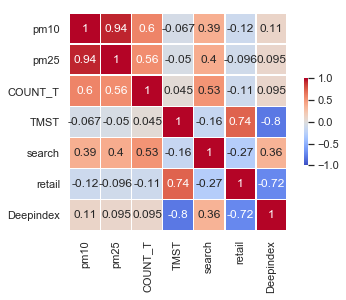

In [35]:
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

In [ ]:
rawdata1.to_csv('../data/rawdata2.csv', index=False)

# 시각화 작업

### 유통 매출지수와의 상관관계

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# 인덱스와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['Deepindex'], y=rawdata1['retail'],line_kws={'color': 'red'})

In [ ]:
# 유동인구와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['TMST'], y=rawdata1['retail'],line_kws={'color': 'red'})

In [ ]:
# 검색률과 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['search'], y=rawdata1['retail'],line_kws={'color': 'red'})

In [ ]:
# 미세먼지와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['pm10'], y=rawdata1['retail'],line_kws={'color': 'red'})

In [ ]:
# 초미세먼지와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['pm25'], y=rawdata1['retail'],line_kws={'color': 'red'})

In [ ]:
# 뉴스기사 개수와 유통 매출지수 상관관계 시각화
sns.regplot(x=rawdata1['COUNT_T'], y=rawdata1['retail'],line_kws={'color': 'red'})

### 인덱스와의 상관관계

In [ ]:
# 유동인구와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['TMST'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

In [ ]:
# 검색률과 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['search'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

In [ ]:
# 뉴스기사 개수와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['COUNT_T'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

In [ ]:
# 미세먼지와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['pm10'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

In [ ]:
# 초미세먼지와 인덱스 상관관계 시각화
sns.regplot(x=rawdata1['pm25'], y=rawdata1['Deepindex'],line_kws={'color': 'green'}, scatter_kws={'color': 'orange'})

# 동별 인덱스 정리

In [ ]:
for name in filenames:
    a = pd.read_csv('../data/total2/'+name)
    
    b = (a-a.mean())/a.std()
    x = b[['pm10','pm25','COUNT_T','TMST','search']]
    
    a['Deepindex'] = model2.predict(x)
    
    a.to_csv('../data/totalin/'+name,index=False)